In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [6]:
df['sentiment'].value_counts()


sentiment
Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

In [7]:
# basic feature extraction | 
import preprocess_kgptalkie as ps

df = ps.get_basic_features(df)


In [8]:
df.columns  

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

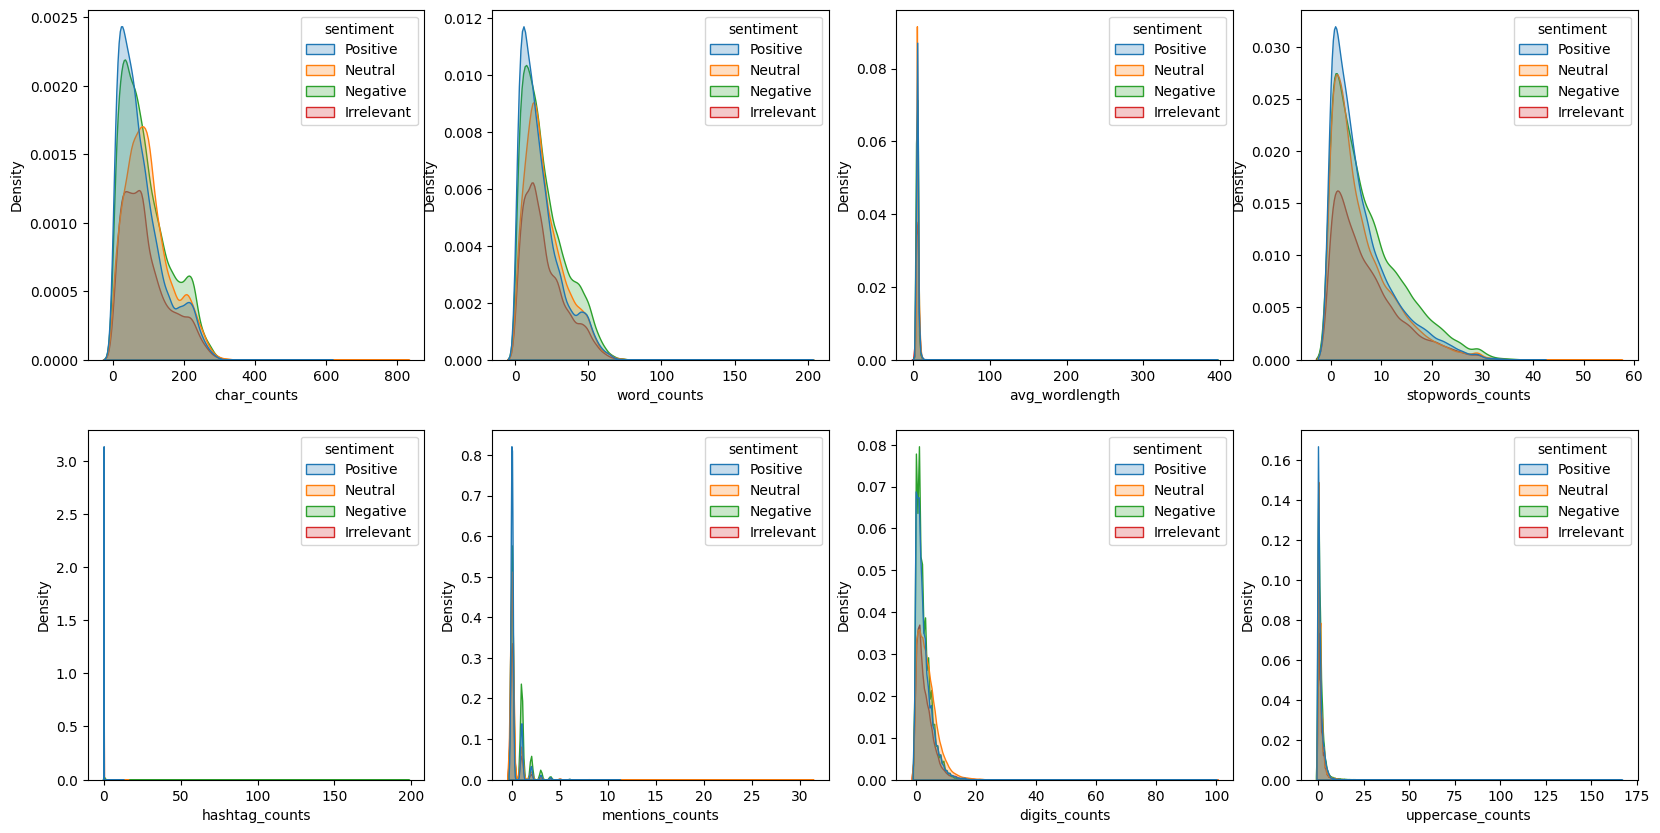

In [9]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

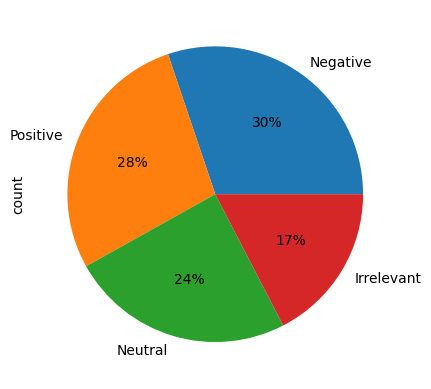

In [10]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

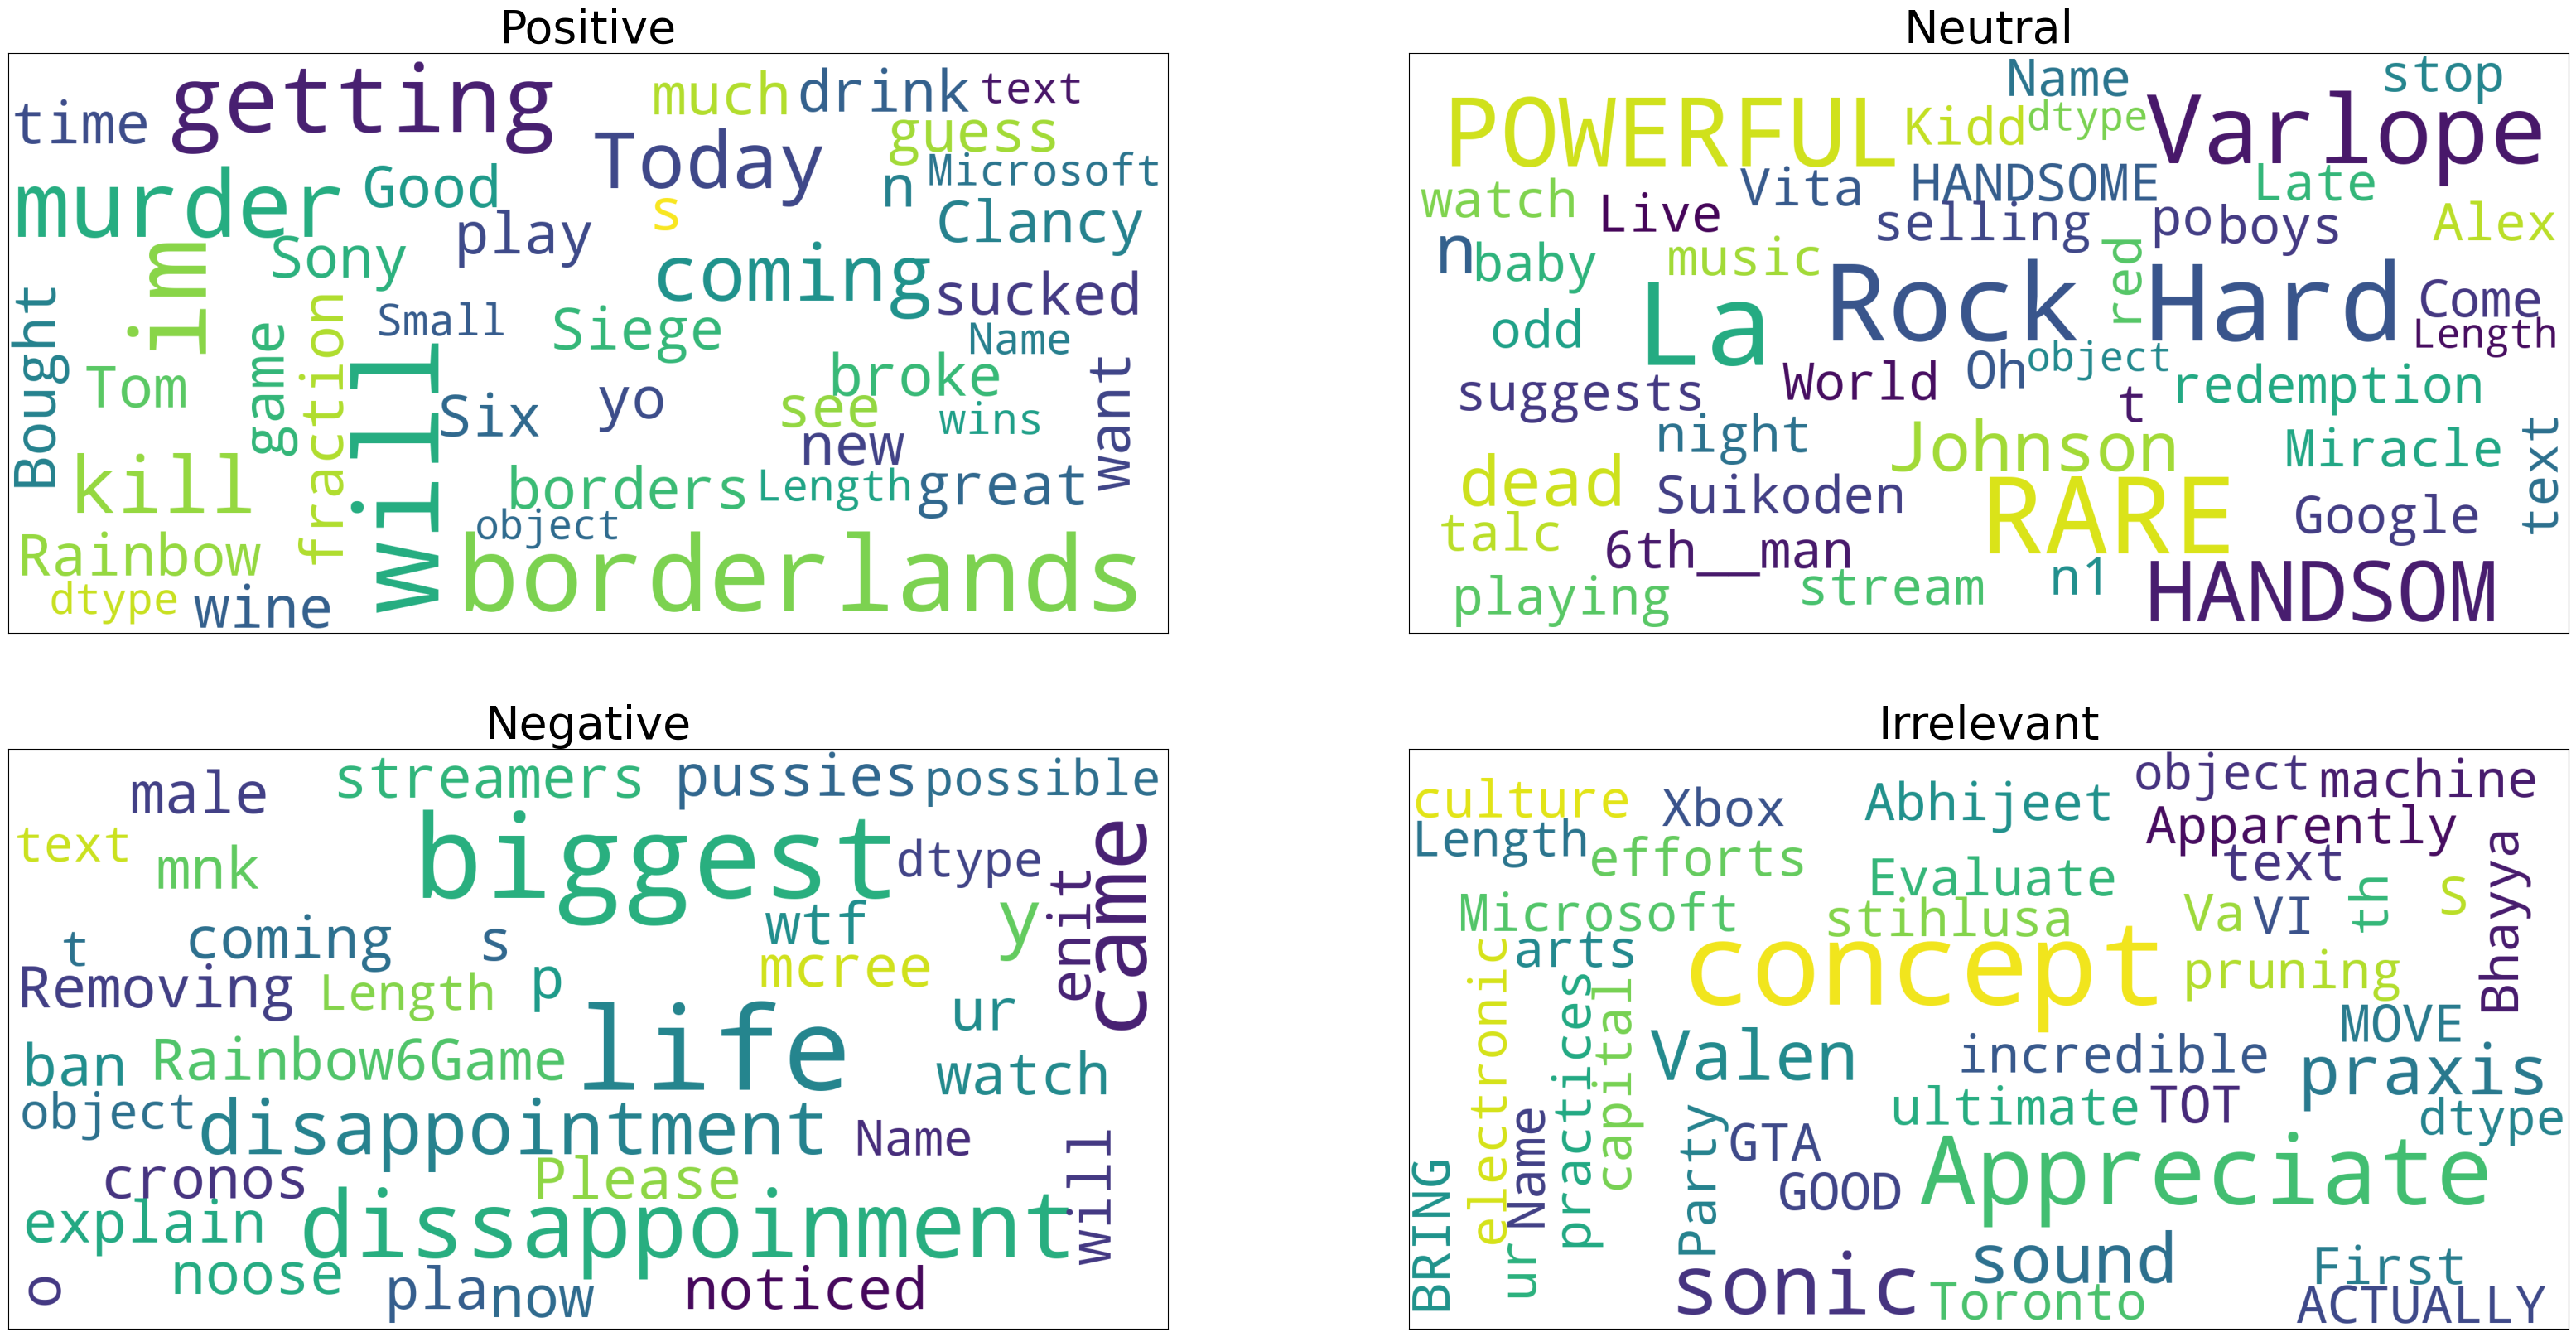

<Figure size 640x480 with 0 Axes>

In [11]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [12]:
# Data Cleaning
# lowercase, remove url, html, punctuations, retweet

df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [13]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_test.shape


((59717,), (14930,))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from sklearn.model_selection import train_test_split

stopwords_list = list(stopwords)

clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

# evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

InvalidParameterError: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {'above', 'itself', "hadn't", 'of', 'out', 'com', 'what', 'has', 'being', 'been', 'you', 'no', 'r', 'ours', 'on', "didn't", 'theirs', "aren't", 'because', "they've", "where's", 'but', 'not', 'nor', 'hers', "you're", "he's", 'who', "here's", 'if', "isn't", 'while', 'only', "they'd", 'each', 'he', "when's", 'after', 'his', 'otherwise', 'also', "we'll", 'below', "it's", "let's", 'cannot', 'in', 'was', 'whom', 'ourselves', 'her', 'himself', 'therefore', "you've", 'when', 'however', 'those', 'here', 'with', 'yourselves', 'get', 'these', 'which', 'too', 'during', "that's", "why's", 'and', 'ever', "i'd", 'its', "hasn't", 'them', "shan't", 'all', 'both', 'for', 'again', 'myself', 'themselves', "weren't", "can't", "couldn't", "there's", 'other', 'would', 'how', "doesn't", 'so', 'this', "i'm", 'ought', 'up', 'off', 'your', "i've", 'doing', 'any', 'since', 'i', "you'd", 'that', "they'll", 'own', 'could', 'or', 'she', "wouldn't", 'be', "i'll", "you'll", 'yours', 'where', 'at', 'than', 'herself', 'him', "he'd", "who's", 'most', 'their', 'very', "we'd", 'between', 'then', "don't", 'about', 'had', "he'll", 'did', 'more', 'against', "she'd", 'from', 'an', "what's", 'am', 'under', "won't", 'do', "she's", 'can', 'have', 'a', 'into', "mustn't", "how's", 'just', 'such', 'why', 'does', 'it', 'else', 'my', 'before', 'http', "we've", "she'll", 'further', 'few', "they're", 'the', 'were', 'some', 'down', 'our', 'k', 'yourself', 'there', 'we', 'are', 'hence', 'to', 'same', 'as', 'is', 'www', "wasn't", 'having', 'through', 'until', 'they', 'me', 'once', 'shall', "haven't", 'should', 'like', 'over', 'by', "we're", "shouldn't"} instead.